In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss
import bbknn
import phate

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()
ss.lib.set_figsize((4, 4))

In [32]:
organoid_ad = sc.read('organoid_concatenated.raw.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [36]:
ss.lib.show_obs_categories(organoid_ad)

day
{'day-133': 80280, 'day-48': 29817, 'day-29': 18500, 'day-85': 18492}
sample_id
{'4': 16779, '9': 15903, '2': 14624, '8': 13914, '3': 13184, '0': 12403, '5': 11960, '1': 11330, '10': 9556, '7': 9356, '6': 9144, '11': 8936}
strain
{'WA25': 76118, 'DSP': 70971}
version
{'v3': 110097, 'v2': 36992}
week
{'17-20_fetal_wks': 80280, '7-10_fetal_wks': 29817, '4-7_fetal_wks': 18500, '14-16_fetal_wks': 18492}


In [39]:
organoid_ad.obs['batch'] = organoid_ad.obs.version.astype(str) + '_' + organoid_ad.obs.strain.astype(str)
organoid_ad.obs['batch'] = organoid_ad.obs['batch'].astype('category')

In [40]:
ss.lib.calculate_qc(organoid_ad)

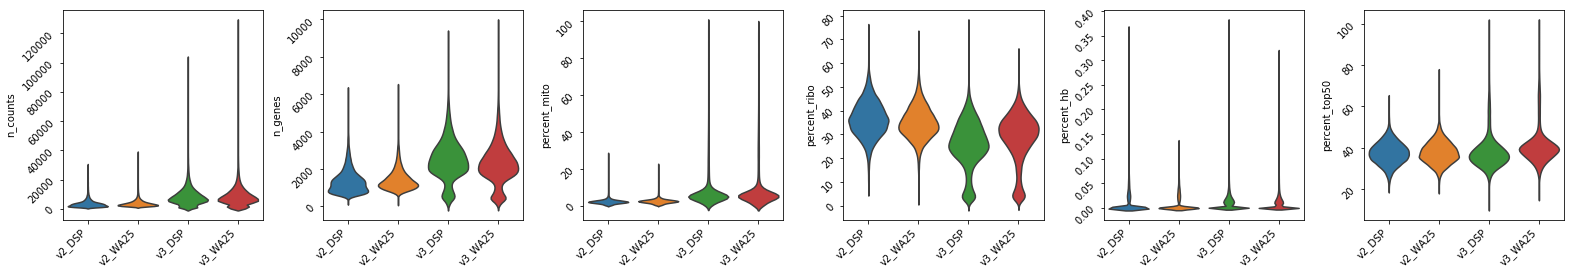

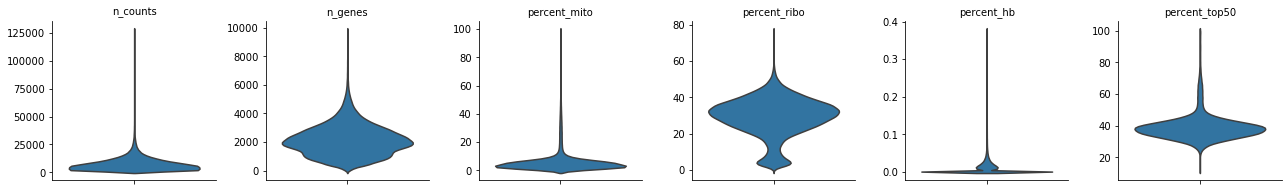

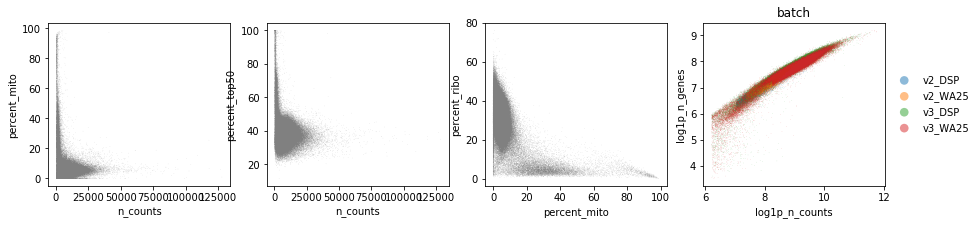

In [41]:
ss.lib.plot_qc(organoid_ad, groupby='batch')

In [42]:
ad = ss.lib.simple_default_pipeline(organoid_ad, batch='batch', filter_kw={'metrics': ['n_counts', 'n_genes', 'percent_mito', 'percent_top50']})

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/ubuntu/miniconda/envs/scrna/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda/envs/scrna/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [26]:
ad

AnnData object with n_obs × n_vars = 130811 × 27320 
    obs: 'day', 'sample_id', 'strain', 'version', 'week', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_r0_1', 'leiden_r0_3', 'leiden_r0_5', 'leiden_r0_7', 'leiden_r0_9', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9'
    var: 'gene_symbols', 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'n_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'leiden', 'day_colors', 'version_colors', 'strain_colors', 'neighbors_hm', 'neighbors'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm', 'X_umap'
    varm: 'PCs'

In [60]:
ss.lib.run_bbknn(ad, batch='batch')
ss.lib.umap(ad, use_graph='neighbors_bk', key_added='bk')

In [ ]:
ss.lib.leiden(ad, use_graph='neighbors_bk', resolution=[0.1, 0.3, 0.5, 0.7, 0.9], key_added='bk')

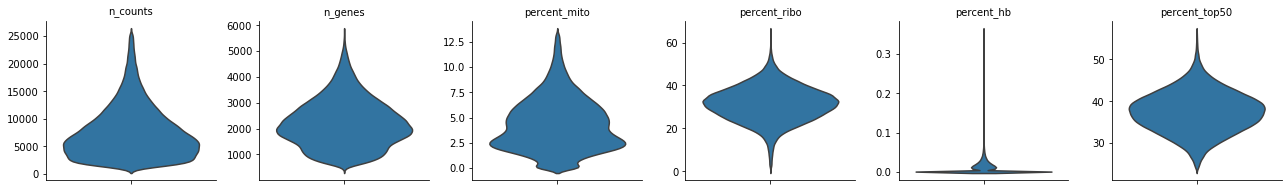

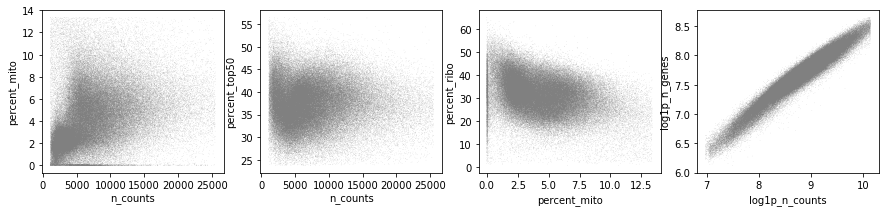

In [11]:
ss.lib.plot_qc(ad)

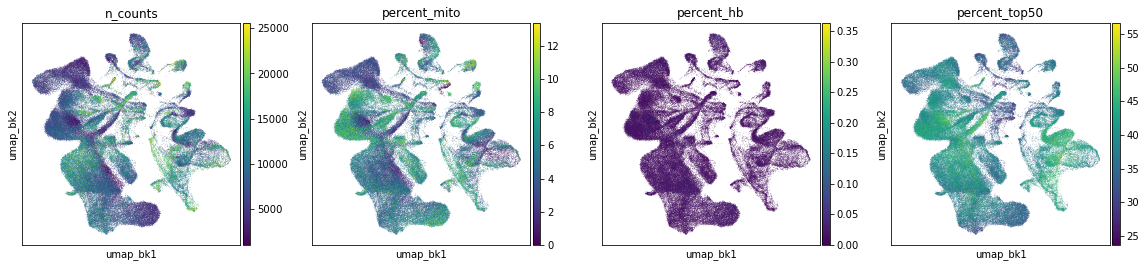

In [180]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad, basis='umap_bk', color=['n_counts', 'percent_mito', 'percent_hb', 'percent_top50'])

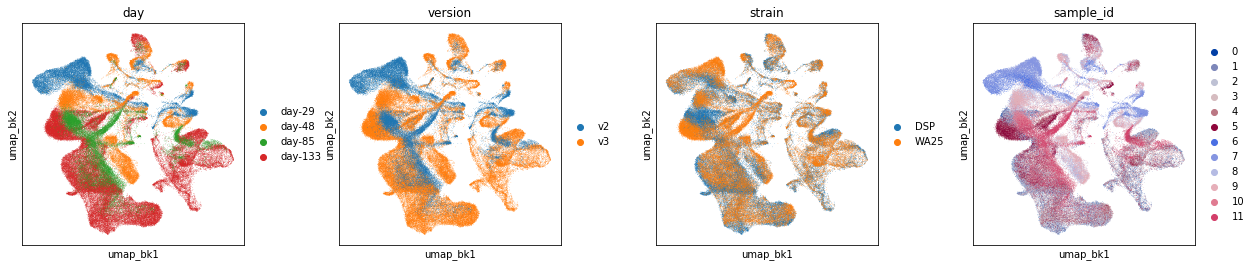

In [181]:
ss.lib.plot_scatter(ad, basis='umap_bk', color=['day', 'version', 'strain', 'sample_id'], wspace=0.3)

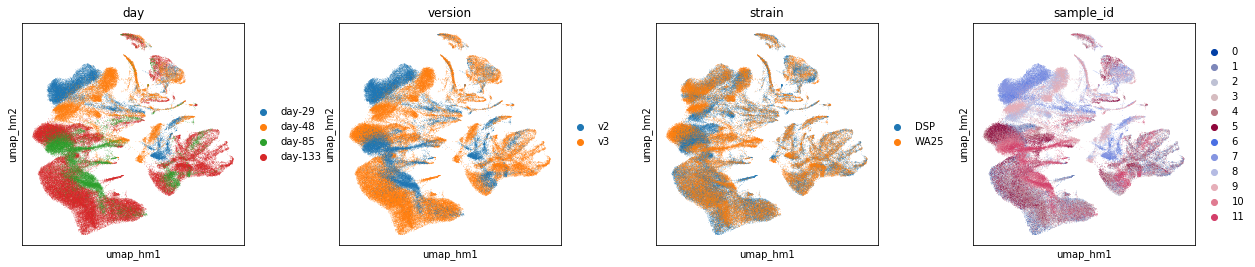

In [184]:
ss.lib.set_figsize((4, 4))
ss.lib.plot_scatter(ad, basis='umap_hm', color=['day', 'version', 'strain', 'sample_id'], wspace=0.3)

In [190]:
# ss.lib.leiden(ad, use_graph='neighbors_bk', restrict_to=('leiden_bk_r0_3',['11']), resolution=0.03, key_added='bk_split1')
# ss.lib.leiden(ad, use_graph='neighbors_bk', restrict_to=('leiden_bk_split1',['14']), resolution=0.1, key_added='bk_split2')
# ss.lib.leiden(ad, use_graph='neighbors_bk', restrict_to=('leiden_bk_split2',['9']), resolution=0.1, key_added='bk_split3')
# ss.lib.leiden(ad, use_graph='neighbors_bk', restrict_to=('leiden_bk_split3',['2']), resolution=0.1, key_added='bk_split4')
ss.lib.leiden(ad, use_graph='neighbors_bk', restrict_to=('leiden_bk_split4',['10']), resolution=0.1, key_added='bk_split5')

['leiden_bk_split5']

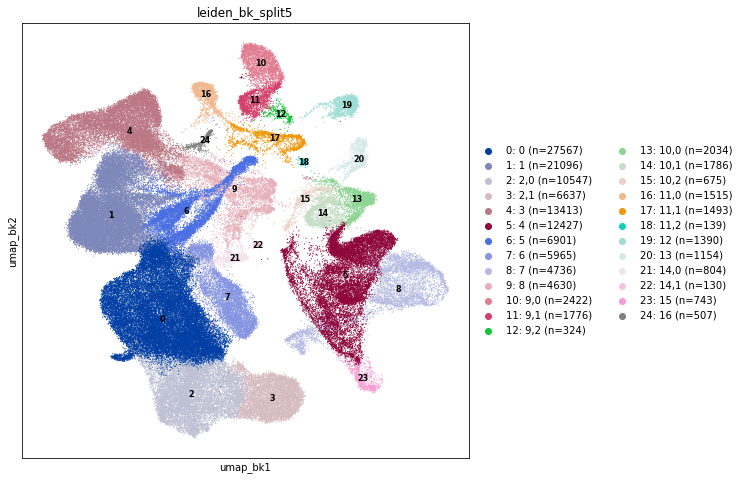

In [191]:
ss.lib.plot_embedding(ad, basis='umap_bk', groupby='leiden_bk_split5', figsize=(8,8), size=5)

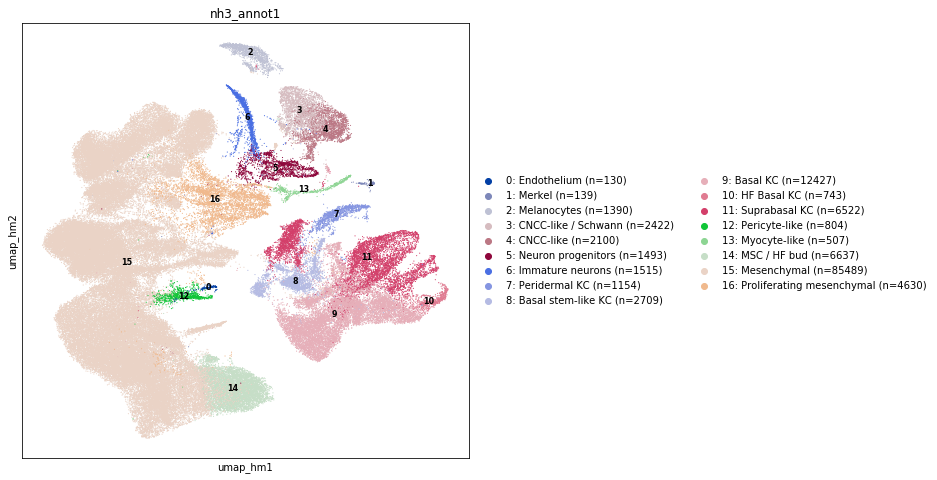

In [206]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='nh3_annot1', figsize=(8,8), size=5)

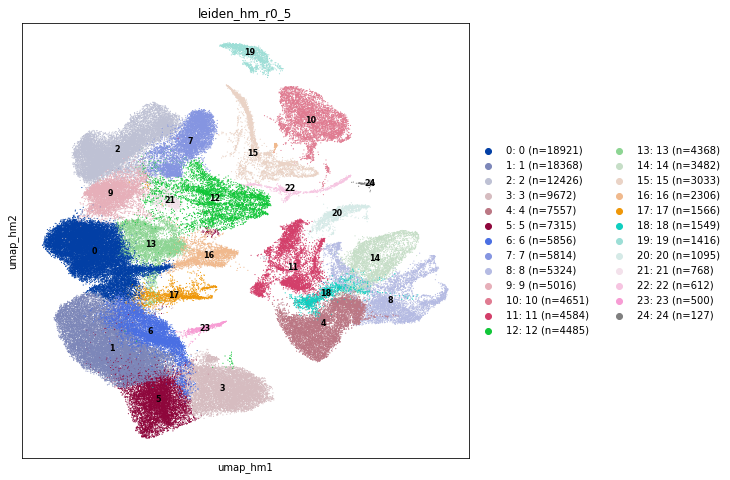

In [205]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_r0_5', figsize=(8,8), size=5)

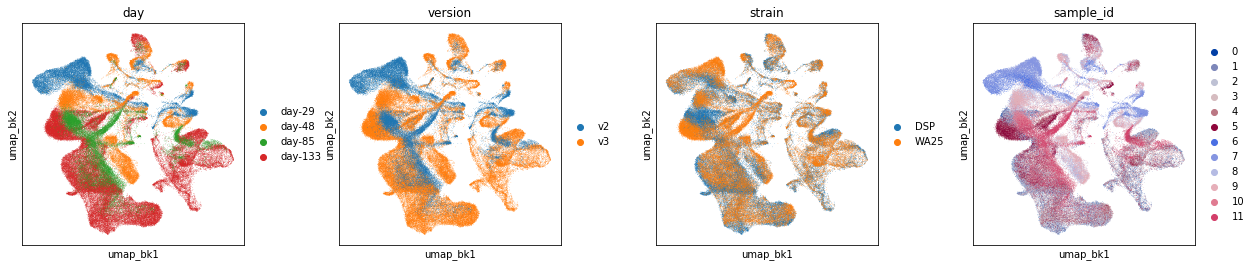

In [67]:
ss.lib.set_figsize((4,4))
ss.lib.plot_scatter(ad, basis='umap_bk', color=['day', 'version', 'strain', 'sample_id'], wspace=0.3)

In [196]:
ad.obs['nh3_annot1'] = ss.lib.regroup(ad, groupby='leiden_bk_split5', regroups={
    'Endothelium': '14,1',
    'Merkel': '11,2',
    'Melanocytes': '12',
    'CNCC-like / Schwann': '9,0',
    'CNCC-like': ['9,1', '9,2'],
    'Neuron progenitors': '11,1',
    'Immature neurons': '11,0',
    'Peridermal KC': '13',
    'Basal stem-like KC': ['10,0', '10,2'],
    'Basal KC': '4',
    'HF Basal KC': '15',
    'Suprabasal KC': ['7', '10,1'],
    'Pericyte-like': '14,0',
    'Myocyte-like': '16',
    'MSC / HF bud': '2,1',
    'Mesenchymal': ['0', '1', '2,0', '3', '5', '6'],
    'Proliferating mesenchymal': '8',
})

In [174]:
markers = [
    'PECAM1', # Endothelium
    'ATOH1', # Merkel
    'TYRP1', # Melanocytes
    'MPZ', # Schwann
    'CDH6', # CNCC-like
    'SOX2', # neuron progenitor
    'STMN2', # immature neuron
    'KRT4', # Epiderm
    'KRT14', 'COL17A1', # Basal KC
    'KRT85', # HF Basal KC
    'KRT1', # Suprabasal KC
    'RGS5', # Pericytes
    'MYOG', # myocyte-like
    'PHLDA1', # HF Bud / MSC
    'PRRX1', # mesenchymal
    'CDK1', # Cycling
    'PTPRC', # Immune
]

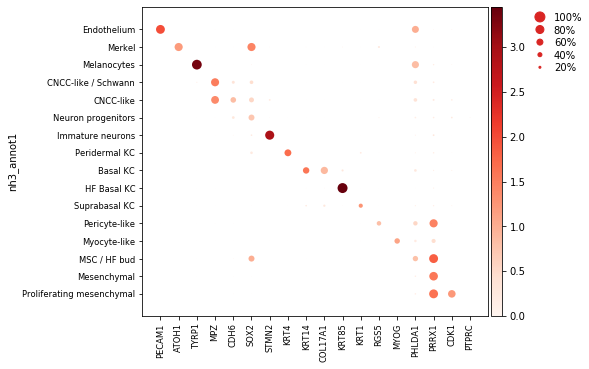

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[6.3, 0, 0.2, 0.5, 0.25])

In [175]:
sc.pl.dotplot(ad, markers, groupby='nh3_annot1')

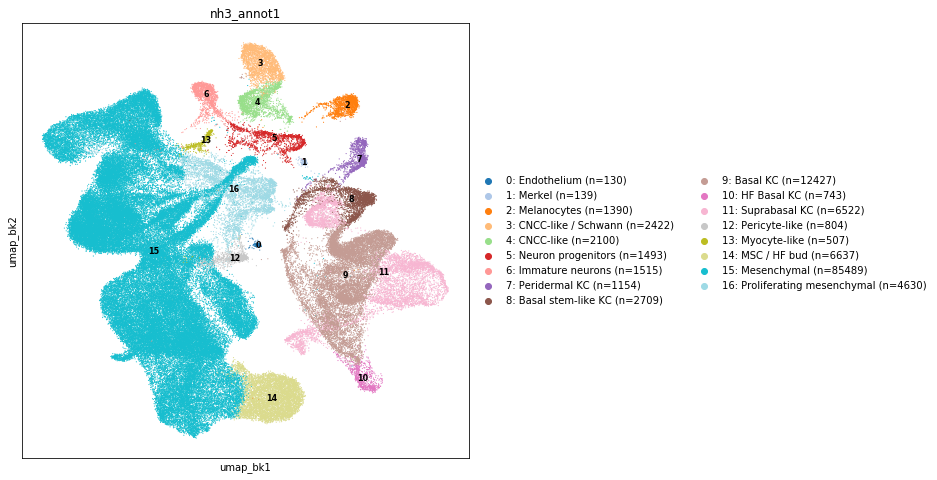

In [197]:
ss.lib.plot_embedding(ad, basis='umap_bk', groupby='nh3_annot1', figsize=(8,8), size=5, palette='tab20')

In [198]:
ad.obs['nh3_broad_annot1'] = ss.lib.regroup(ad, groupby='nh3_annot1', regroups={
    'Endothelium': 'Endothelium',
    'Merkel': '11,2',
    'Melanocytes': 'Melanocytes',
    'Neuronal': ['CNCC-like / Schwann', 'CNCC-like', 'Neuron progenitors', 'Immature neurons'],
    'Keratinocytes': ['Peridermal KC', 'Basal stem-like KC', 'Basal KC', 'HF Basal KC', 'Suprabasal KC'],
    'Stroma': ['Pericyte-like', 'Myocyte-like', 'MSC / HF bud', 'Mesenchymal', 'Proliferating mesenchymal'],
})

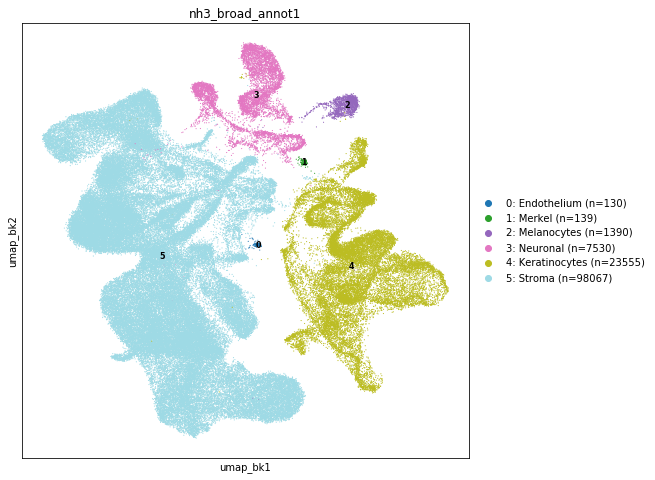

In [199]:
ss.lib.plot_embedding(ad, basis='umap_bk', groupby='nh3_broad_annot1', figsize=(8,8), size=5, palette='tab20')

In [169]:
kc_ad = ad[ad.obs.nh3_annot1.isin(['Peridermal KC', 'Basal KC', 'HF Basal KC', 'Suprabasal KC']), :].copy()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


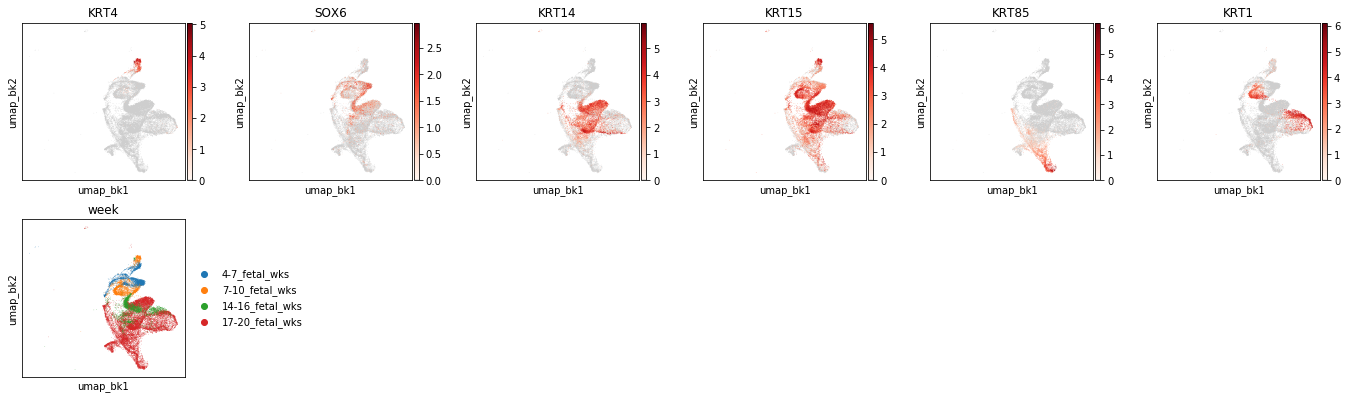

In [178]:
ss.lib.set_figsize((3,3))
ss.lib.plot_scatter(kc_ad, basis='umap_bk', color=['KRT4', 'SOX6', 'KRT14', 'KRT15', 'KRT85', 'KRT1', 'week'], color_map=expr_cmap, ncols=6, size=1)

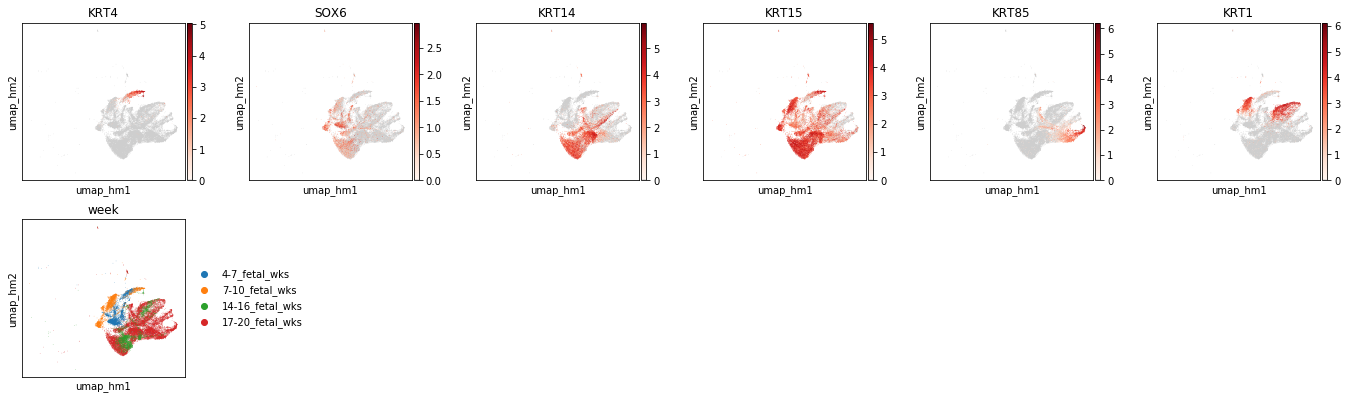

In [201]:
ss.lib.set_figsize((3,3))
ss.lib.plot_scatter(kc_ad, basis='umap_hm', color=['KRT4', 'SOX6', 'KRT14', 'KRT15', 'KRT85', 'KRT1', 'week'], color_map=expr_cmap, ncols=6, size=1)

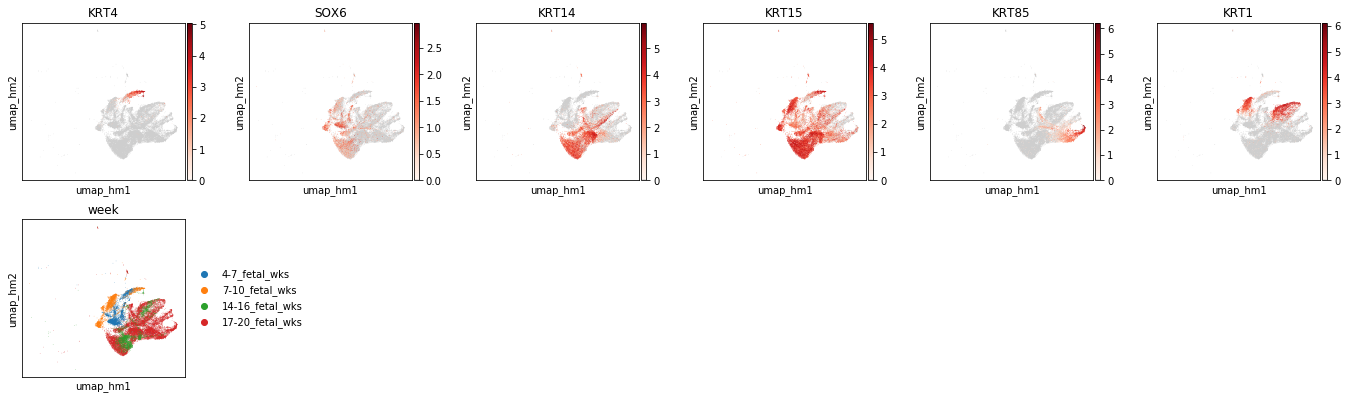

In [179]:
ss.lib.set_figsize((3,3))
ss.lib.plot_scatter(kc_ad, basis='umap_hm', color=['KRT4', 'SOX6', 'KRT14', 'KRT15', 'KRT85', 'KRT1', 'week'], color_map=expr_cmap, ncols=6, size=1)

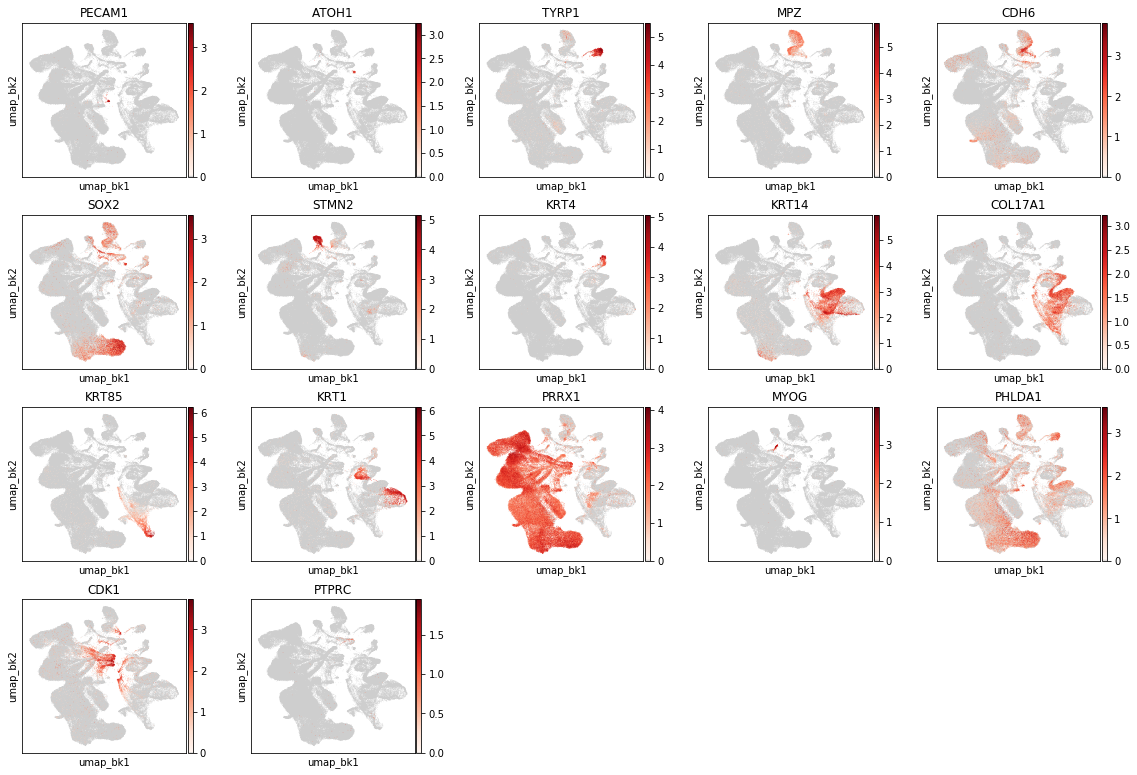

In [156]:
ss.lib.set_figsize((3,3))
ss.lib.plot_scatter(ad, basis='umap_bk', color=markers, color_map=expr_cmap, ncols=5)

In [202]:
ad

AnnData object with n_obs × n_vars = 130811 × 27320 
    obs: 'day', 'sample_id', 'strain', 'version', 'week', 'batch', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_3', 'leiden_hm_r0_5', 'leiden_hm_r0_7', 'leiden_hm_r0_9', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'leiden_bk_r0_7', 'leiden_bk_r0_9', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'leiden_bk_split4', 'nh3_annot1', 'leiden_bk_split5', 'nh3_broad_annot1'
    var: 'gene_symbols', 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'n_genes', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'pca', 'neighbors_hm', 'leiden', 'day_colors', 'version_colors', 'strain_colors', 'sample_id_colors', 'leiden_hm_r0_3_colors', 'leiden_hm_r0_5_colors', 'leiden_hm_r0_7_colors', 'leiden_hm_r0_9_colors', 'neighbors_bk', 'neighbors', 'leiden_bk_r0_3_colors', 'leiden_bk

In [203]:
ss.lib.clear_colors(ad)
ad.write('organoid.processed.h5ad', compression='lzf')

In [2]:
ad = sc.read('organoid.processed.h5ad')

In [3]:
ad1 = anndata.AnnData(
    X=ad.raw.X,
    obs=ad.obs[[
        'sample_id', 'version', 'week', 'day', 'strain', 'batch',
        'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50',
        'leiden_bk_split5', 'nh3_annot1', 'nh3_broad_annot1',
    ]],
    var=ad.var[['gene_ids', 'gene_symbols', 'highly_variable']]
)
ad1.obsm['X_umap_hm'] = ad.obsm['X_umap_hm']
ad1.obsm['X_umap_bk'] = ad.obsm['X_umap_bk']
ad1.var_names_make_unique()

In [4]:
ad1.write('organoid.cellxgene.h5ad', compression='lzf')

In [188]:
ad1

AnnData object with n_obs × n_vars = 130811 × 27320 
    obs: 'sample_id', 'version', 'week', 'day', 'strain', 'batch', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_bk_split4', 'nh3_annot1'
    var: 'gene_ids', 'gene_symbols'
    obsm: 'X_umap_hm', 'X_umap_bk'